<a href="https://colab.research.google.com/github/Dawoon-Jeong0523/Lecture_UNIST_2024_Fall/blob/main/Week13_Unsupervised_Learning_%26_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning

In the supervised learning setting, we typically have access to a set of $p$ features $X_1, X_2, \dots, X_p$, measured on $n$ observations, and a response $Y$ also measured on those same $n$ observations. The goal is then to predict $Y$ using $X_1, X_2, \dots, X_p$.

While in the **unsupervised learning**, a set of statistical tools intended for the setting in which we have only a set of features $X_1, X_2, \dots, X_p$ measured on $n$ observations. We are not interested in prediction, because we do not have an associated response variable $Y$. Rather, the goal is to discover interesting things about the measurements on $X_1, X_2, \dots, X_p$.

Some key questions that unsupervised learning seeks to answer include:
- **Is there an informative way to visualize the data?**
- **Can we discover subgroups among the variables or among the observations?**

Unsupervised learning refers to a diverse set of techniques for answering questions such as these. We will focus on two particular types of unsupervised learning:

1. **Principal Components Analysis (PCA)**: A tool used for data visualization or data pre-processing before supervised techniques are applied.
2. **Clustering**: A broad class of methods for discovering unknown subgroups in data.


## The Challenge of Unsupervised Learning

**Supervised learning** is a well-understood area. For instance, when tasked with predicting a binary outcome from a data set, you have a well-developed set of tools at your disposal, such as:
- Logistic regression
- Linear discriminant analysis
- Classification trees
- Support vector machines

Additionally, you understand how to assess the quality of results using methods like cross-validation or validation on an independent test set.

In contrast, **unsupervised learning** is often much more challenging. This is due to several key differences:
- The exercise tends to be more subjective, with no clear goal such as predicting a response.
- It is typically performed as part of an **exploratory data analysis**, which makes interpretation more complex.
- Assessing results is harder, as there is no universally accepted mechanism like cross-validation or independent test set validation.

### Why is Unsupervised Learning Challenging?
The main reason for this difference is straightforward:
- In supervised learning, we can evaluate how well a predictive model works by measuring how accurately it predicts the response $Y$ on new data.
- In unsupervised learning, we lack a "true answer" to compare against, making it difficult to validate the outcomes of the analysis.

### Applications of Unsupervised Learning
Despite its challenges, unsupervised learning is of growing importance across many fields. Below are a few examples:
- **Cancer Research**: A researcher might assay gene expression levels in 100 patients with breast cancer and then look for subgroups among the samples or genes to gain a deeper understanding of the disease.
- **E-commerce**: Online shopping sites can identify groups of shoppers with similar browsing and purchase behaviors, as well as recommend items that are particularly relevant to each group.
- **Search Engines**: Search engines might tailor search results to individuals based on the click histories of others with similar search patterns.

These tasks, and many more, leverage the power of unsupervised learning to derive insights and make informed decisions.


## Principal Components Analysis (PCA)

When faced with a large set of correlated variables, **principal components** summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original data. These components are defined as directions in feature space where the original data exhibit high variability and represent lines or subspaces that are as close as possible to the data cloud.

In **Principal Components Regression (PCR)**, principal components are used as predictors in place of the original variables. On the other hand, **Principal Components Analysis (PCA)** refers to the process of computing these components and using them to understand the data. PCA is an **unsupervised method**, as it only requires a set of features $X_1, X_2, \dots, X_p$ without an associated response $Y$. Beyond producing derived variables for supervised learning, PCA is also valuable for:
- **Data visualization**: Visualizing observations or variables.
- **Data imputation**: Filling in missing values in a data matrix.




### What Are Principal Components?

Suppose we have $n$ observations with $p$ features $X_1, X_2, \dots, X_p$. To explore the data, one approach is to examine scatterplots of all possible pairs of features. However, there are $\binom{p}{2} = \frac{p(p-1)}{2}$ such scatterplots, which becomes impractical for large $p$. For instance, when $p = 10$, there are 45 scatterplots. Moreover, individual scatterplots often fail to capture the overall information in the data. A better approach is to find a **low-dimensional representation** of the data that retains as much information as possible.

PCA achieves this by finding a low-dimensional representation of a dataset that captures most of the variation. While each observation exists in $p$-dimensional space, PCA identifies a smaller number of **dimensions** that maximize variability. These dimensions, called **principal components**, are linear combinations of the $p$ features.

---



#### The First Principal Component
The **first principal component** is the normalized linear combination of the features:


$
Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \dots + \phi_{p1}X_p
$


that has the largest variance, subject to the constraint:


$
\sum_{j=1}^p \phi_{j1}^2 = 1
$


The coefficients $\phi_{11}, \dots, \phi_{p1}$ are called the **loadings** of the first principal component. Together, they form the **loading vector** $\phi_1 = (\phi_{11}, \phi_{21}, \dots, \phi_{p1})^T$.

Given an $n \times p$ dataset $X$ (centered so each column has mean zero), the first principal component solves the optimization problem:


$
\text{maximize } \frac{1}{n} \sum_{i=1}^n \left( \sum_{j=1}^p \phi_{j1} x_{ij} \right)^2 \quad \text{subject to } \sum_{j=1}^p \phi_{j1}^2 = 1
$


This corresponds to maximizing the sample variance of the principal component scores:


$
z_{i1} = \phi_{11}x_{i1} + \phi_{21}x_{i2} + \dots + \phi_{p1}x_{ip}
$


#### The Second Principal Component
The **second principal component** $Z_2$ is defined similarly, except it is uncorrelated with $Z_1$. The loading vector $\phi_2$ is orthogonal to $\phi_1$. This process continues for subsequent components.

### Geometric Interpretation
The first principal component identifies the direction in feature space where the data vary the most. Projecting the data onto this direction gives the principal component scores $z_{11}, z_{21}, \dots, z_{n1}$. Subsequent components capture the remaining variability in orthogonal directions.

---



### Data: USArrests Data
The **USArrests dataset** contains the following variables for 50 U.S. states:
- **Assault**, **Murder**, and **Rape**: Arrests per 100,000 residents for each crime.
- **UrbanPop**: Percentage of the population living in urban areas.

After standardizing the variables (mean zero and standard deviation one), PCA was applied:
- The **first principal component** places nearly equal weight on **Assault**, **Murder**, and **Rape**, representing overall crime rates.
- The **second principal component** emphasizes **UrbanPop**, representing urbanization levels.

### Insights from PCA
- **Crime-related variables** (Murder, Assault, Rape) are correlated, as states with high rates for one tend to have high rates for the others.
- **UrbanPop** is less correlated with the crime-related variables.

For instance:
- States like California, Nevada, and Florida have high crime rates (high scores on the first component).
- States like North Dakota have low crime rates (negative scores on the first component).
- Urbanized states like California have high scores on the second component, while less urbanized states like Mississippi have low scores.

In [ ]:
import os
os.chdir('/content/drive/My Drive/Lecture')

In [ ]:
import pandas as pd

data = pd.read_csv('./Data/USArrests.csv', index_col=0)
data.head()

In [ ]:
data.corr()

In [ ]:
import numpy as np

### NumPy Implementation
# Step 1: Standardize the data
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
standardized_data = (data - data_mean) / data_std

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Compute principal components
principal_components = np.dot(standardized_data, eigenvectors)

# Step 6: Calculate PVE
total_variance = np.sum(eigenvalues)
pve_numpy = eigenvalues / total_variance
cumulative_pve_numpy = np.cumsum(pve_numpy)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Scikit-learn Implementation
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA using sklearn
pca = PCA()
pca.fit(data_scaled)
components_sklearn = pca.transform(data_scaled)

# Results from sklearn
eigenvalues_sklearn = pca.explained_variance_
eigenvectors_sklearn = pca.components_.T
pve_sklearn = pca.explained_variance_ratio_
cumulative_pve_sklearn = np.cumsum(pve_sklearn)

### Comparison
print("NumPy Eigenvalues (Variance):", eigenvalues)
print("Scikit-learn Eigenvalues (Variance):", eigenvalues_sklearn)

In [ ]:
print("\nNumPy Eigenvectors (Loadings):\n", eigenvectors)
print("\nScikit-learn Eigenvectors (Loadings):\n", eigenvectors_sklearn)

In [ ]:
print("\nNumPy PVE:", pve_numpy)
print("Scikit-learn PVE:", pve_sklearn)

In [ ]:
print("\nNumPy Cumulative PVE:", cumulative_pve_numpy)
print("Scikit-learn Cumulative PVE:", cumulative_pve_sklearn)

In [ ]:
print("\nNumPy Principal Components (Scores):\n", principal_components[:5])
print("\nScikit-learn Principal Components (Scores):\n", components_sklearn[:5])

---

### Biplot for the USArrests Data

The first two principal components for the **USArrests** data are visualized using a **biplot**. This figure provides insights into both the principal component scores and the loading vectors.

### Biplot Characteristics
- **Principal Component Scores**:
  - Show the relative positions of observations (e.g., states) in the reduced principal component space.
  - States that are close together in the biplot are similar based on the selected principal components.

- **Principal Component Loadings**:
  - Represent the contribution of each variable to the principal components.
  - The direction of an arrow indicates the orientation of the variable in the principal component space.
  - The length of an arrow reflects the strength of the variable's influence on the principal components.

- **Combined View**:
  - Enables simultaneous analysis of relationships between observations (e.g., states) and variables (e.g., Rape, Murder).
  - Highlights how variables contribute to the grouping or separation of observations.


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot principal component scores (state points)
pc1 = principal_components[:, 0]
pc2 = principal_components[:, 1]
for i, state in enumerate(data.index):
    plt.text(pc1[i], pc2[i], state, color="blue", fontsize=10)
    plt.scatter(pc1[i], pc2[i], color="blue")

# Plot principal component loading vectors (arrows)
loadings = eigenvectors[:, :2]
for i, feature in enumerate(data.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color="orange", head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0], loadings[i, 1], feature, color="orange", fontsize=10)

# Customize plot
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Biplot: USArrests Data")
plt.grid()
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
eigenvectors[:, :2]


### Interpretation
- The **Rape** variable contributes significantly to the first principal component (loading = 0.54), while its influence on the second component is relatively small (loading = 0.17).
- States that are far along the direction of the Rape arrow are characterized by high values for this variable.

Biplots are a powerful tool for reducing dimensionality while preserving and visualizing the most critical patterns in data.


In [ ]:
# Feature names
features = ["Murder", "Assault", "UrbanPop", "Rape"]

# Create a DataFrame
eigenvectors_df = pd.DataFrame(eigenvectors, columns=["PC1", "PC2","PC3", "PC4"], index=features)
eigenvectors_df

#### Interpretation
- **Murder and Assault**: Contribute significantly to PC1, indicating their strong correlation with this component.
- **UrbanPop**: Dominates PC2, suggesting its unique contribution to this dimension.

---

### The Proportion of Variance Explained (PVE)

**How much information is lost by projecting the data onto the first few principal components?** This can be addressed by calculating the **Proportion of Variance Explained (PVE)** by each principal component.


#### Total Variance
The total variance in a dataset (assuming the variables are centered) is:


$
\sum_{j=1}^p \text{Var}(X_j) = \sum_{j=1}^p \frac{1}{n} \sum_{i=1}^n x_{ij}^2
$

---

#### Variance Explained by the $m$-th Principal Component
The variance explained by the $m$-th principal component is:


$
\frac{1}{n} \sum_{i=1}^n z_{im}^2 = \frac{1}{n} \sum_{i=1}^n \left( \sum_{j=1}^p \phi_{jm} x_{ij} \right)^2
$

---

#### Proportion of Variance Explained (PVE)
The PVE for the $m$-th principal component is given by:


$
\text{PVE}_m = \frac{\sum_{i=1}^n z_{im}^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2}
$
or equivalently:

$
\text{PVE}_m = \frac{\sum_{i=1}^n \left( \sum_{j=1}^p \phi_{jm} x_{ij} \right)^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2}
$

---

#### Cumulative PVE
The cumulative PVE for the first $M$ principal components is the sum of the PVEs for the first $M$ components. The total number of principal components is $\min(n-1, p)$, and their cumulative PVE always sums to 1.

---

#### Variance Decomposition
The total variance can be decomposed as:

$
\text{Total Variance} = \text{Variance of First $M$ PCs} + \text{Mean Squared Error of $M$-dimensional Approximation}
$
or:


$
\sum_{j=1}^p \frac{1}{n} \sum_{i=1}^n x_{ij}^2 = \sum_{m=1}^M \frac{1}{n} \sum_{i=1}^n z_{im}^2 + \frac{1}{n} \sum_{j=1}^p \sum_{i=1}^n \left( x_{ij} - \sum_{m=1}^M z_{im} \phi_{jm} \right)^2
$

---

#### PVE and $R^2$ Connection
Using the residual sum of squares (RSS) and total sum of squares (TSS):

$
\text{PVE}_M = 1 - \frac{\text{RSS}}{\text{TSS}}
$

This shows that the PVE is equivalent to the $R^2$ value for approximating the dataset $X$ using the first $M$ principal components.

---


In [ ]:
eigenvalues

In [ ]:
# Calculate PVE
total_variance = np.sum(eigenvalues)
pve_numpy = eigenvalues / total_variance
cumulative_pve_numpy = np.cumsum(pve_numpy)
pve_numpy

In [ ]:
variances = np.var(standardized_data @ eigenvectors, axis=0)
total_variance_2 = np.sum(variances)
pve_from_2 = variances / total_variance_2
pve_from_2


#### USArrests Data
- The **first principal component** explains **62.0%** of the variance.
- The **second principal component** explains **24.7%** of the variance.
- Together, the first two components explain **87%** of the variance.
- The last two components explain the remaining **13%**.

---

#### Visualization
The **scree plot** illustrates:
- The PVE for each principal component.
- The cumulative PVE, highlighting how much variance is explained as additional components are included.

In [ ]:
# Plot scree plot and cumulative PVE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Scree plot
axes[0].plot(range(1, len(pve_numpy) + 1), pve_numpy, marker='o', linestyle='-', color='orange')
axes[0].set_title('Scree Plot')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Proportion of Variance Explained')
axes[0].set_xticks(range(1, len(pve_numpy) + 1))
axes[0].grid(True, linestyle='--', alpha=0.7)

# Right: Cumulative PVE plot
axes[1].plot(range(1, len(cumulative_pve_numpy) + 1), cumulative_pve_numpy, marker='o', linestyle='-', color='orange')
axes[1].set_title('Cumulative Proportion of Variance Explained')
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Cumulative Proportion of Variance Explained')
axes[1].set_xticks(range(1, len(cumulative_pve_numpy) + 1))
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Additional Points on PCA

### Scaling the Variables

Before performing **PCA**, it is important to **center the variables** to have a mean of zero. Additionally, the results of PCA depend on whether the variables have been **scaled** (i.e., adjusted by a constant). This scaling step is crucial when variables are measured in different units.

#### Why Scaling Matters
- In PCA, variables with larger variances dominate the first principal components.
- For example, in the **USArrests** dataset, the variables have the following variances:
  - **Murder**: 18.97
  - **Rape**: 87.73
  - **Assault**: 6945.16
  - **UrbanPop**: 209.5
- Without scaling, the first principal component will heavily favor variables like **Assault** due to its large variance.

#### Scaling Example
- **Scaled Data**: Each variable is scaled to have a standard deviation of 1.
- **Unscaled Data**: When PCA is performed on unscaled data, the results differ significantly:
  - The first principal component primarily loads on **Assault**.
  - The second principal component primarily loads on **UrbanPop**.

This demonstrates that **scaling significantly impacts PCA results**, especially when variables have different units of measurement. To avoid arbitrary scaling effects, variables are typically scaled to have a standard deviation of 1.

---

#### Special Cases
- If all variables are measured in the same unit (e.g., gene expression levels), scaling may not be necessary.
- The decision to scale depends on the context and the units of the variables.

---

In [ ]:
# Variable names
columns = ["Murder", "Assault", "UrbanPop", "Rape"]

# Without scaling
pca_unscaled = PCA(n_components=2)  # Limit to first two components
principal_components_unscaled = pca_unscaled.fit_transform(data)
loadings_unscaled = pd.DataFrame(pca_unscaled.components_.T, columns=["PC1", "PC2"], index=columns)

# Display results
loadings_unscaled



### Uniqueness of the Principal Components

In theory, principal components are not unique; however, in practice, they are unique **up to sign flips**:
- **Sign Flips**:
  - Principal components define directions in the feature space.
  - Flipping the sign of a loading vector does not change the direction (e.g., a vector pointing north vs. south).
- **Score Vectors**:
  - Score vectors ($Z$) are unique up to sign flips, as the variance of $Z$ is the same as the variance of $-Z$.

This property ensures that different software packages yield consistent principal components, except for possible sign flips.

---



### Deciding How Many Principal Components to Use

An $n \times p$ data matrix has at most $\min(n-1, p)$ distinct principal components. However, we typically focus on a smaller number of components for visualization or interpretation.

##### Choosing the Number of Components
1. **Scree Plot**:
   - Examine the scree plot.
   - Look for an "elbow," where the proportion of variance explained (PVE) drops significantly.
   - Example: The first two principal components explain most of the variance, and the third and fourth components contribute little.

2. **Application-Dependent**:
   - The number of components required depends on the specific data and the application.
   - If the first few components reveal interesting patterns, explore more components.

3. **Supervised Analysis**:
   - When PCA is used in supervised tasks (e.g., principal components regression), the number of components can be treated as a **tuning parameter**.
   - Use cross-validation or similar approaches to select the optimal number of components.

---


## Clustering

Clustering encompasses a broad range of techniques aimed at identifying subgroups, or **clusters**, within a dataset. The goal is to partition observations into distinct groups such that:
- Observations within the same group are **similar**.
- Observations in different groups are **different**.


### Key Considerations

The definition of "similarity" or "difference" between observations is often **domain-specific** and depends on the context of the data.


---

### Clustering vs. PCA
Both clustering and PCA simplify datasets, but their objectives and methods are different:
- **PCA**:
  - Seeks a **low-dimensional representation** that explains a large portion of the variance in the data.
- **Clustering**:
  - Aims to identify **homogeneous subgroups** within the data.

---

### Applications of Clustering
Clustering is widely used in various fields, such as:
- **Marketing**:
  - Identify subgroups of individuals (e.g., by income, occupation, distance to urban areas) to perform market segmentation.
  - Goal: Tailor advertising or product offerings to specific subgroups.
- **Genomics**:
  - Discover subtypes of diseases based on gene expression data.

---

### Popular Clustering Methods
1. **K-Means Clustering**:
   - Partitions observations into a **pre-specified number of clusters** ($k$).
   - **Key Idea**: Minimize within-cluster variance.
   - Suitable when the number of clusters is known in advance.

2. **Hierarchical Clustering**:
   - Does not require pre-specifying the number of clusters.
   - Produces a **dendrogram** (tree-like representation), showing clustering results for all possible numbers of clusters (from 1 to $n$).
   - Allows flexible exploration of cluster structures.

---

### Observations vs. Features
- **Clustering Observations**: Group observations (rows) based on their features (columns) to identify subgroups.
- **Clustering Features**: Group features (columns) based on their relationships across observations (rows).

The two approaches are interchangeable by transposing the data matrix.



### Data: Breast Cancer Tissue Samples
- **Observations**: Tissue samples from patients.
- **Features**: Clinical or gene expression measurements.
- **Goal**: Identify unknown subtypes of breast cancer.
- **Clustering's Role**: Discover potential subgroups in an **unsupervised** manner.

This differs from supervised problems, where the aim is to predict an outcome variable, such as survival time or drug response.

In [ ]:
data = pd.read_csv('./Data/Heart.csv', index_col=0)
data.head()

### K-Means Clustering

**K-Means Clustering** is a straightforward method for partitioning a dataset into $K$ distinct, non-overlapping clusters. Each observation is assigned to exactly one of the $K$ clusters.

---

### Key Steps in K-Means Clustering
1. **Cluster Assignment**:
   - Partition the $n$ observations into $K$ clusters, denoted as $C_1, C_2, \dots, C_K$.
   - Each observation belongs to exactly one cluster, and clusters are non-overlapping:
     $
     C_1 \cup C_2 \cup \cdots \cup C_K = \{1, \dots, n\}, \quad C_k \cap C_{k'} = \emptyset \; (k \neq k').
     $

2. **Objective**:
   - Minimize the **total within-cluster variation**:
   
   - $\text{minimize}_{C_1, \dots, C_K} \sum_{k=1}^K W(C_k)$

     where $W(C_k)$ measures the within-cluster variation for cluster $C_k$.

3. **Within-Cluster Variation**:
   - The most common measure is the **squared Euclidean distance**:
     $
     W(C_k) = \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2,
     $
     where $|C_k|$ is the number of observations in cluster $C_k$.

4. **Optimization Problem**:
   - Combining the objective and the within-cluster variation gives:
     
  $
  \text{minimize}_{C_1, \dots, C_K} \sum_{k=1}^K \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p (x_{ij} - x_{i'j})^2.
  $

---

### K-Means Algorithm
1. **Initialization**:
   - Randomly assign each observation to one of the $K$ clusters.

2. **Iterative Steps**:

   - Repeat the following steps until cluster assignments stop changing:
  1. **Compute the centroid of each cluster ($C_k$)**:
        
  $
  \bar{x}_{kj} = \frac{1}{|C_k|} \sum_{i \in C_k} x_{ij}, \quad j = 1, \dots, p.
  $

  Here:
  - $\bar{x}_{kj}$ represents the mean value for the $j$-th feature within cluster $C_k$.
  - $|C_k|$ is the number of observations in cluster $C_k$.

  2. **Assign each observation to the cluster whose centroid is closest**:
        - Calculate the **Euclidean distance** between each observation and the cluster centroids.
        - Reassign each observation to the nearest cluster.


     
     
---

### Why the Algorithm Works
- The algorithm guarantees that the objective function (within-cluster variation) will decrease at every step:
  - **Step 2 - 1** minimizes the sum of squared deviations for each feature by computing cluster centroids.
  - **Step 2 - 2** reassigns observations to their nearest cluster, further reducing the total variation.

- The algorithm converges to a **local optimum** (not necessarily a global optimum).

---

### Practical Considerations
1. **Dependence on Initialization**:
   - The final clustering depends on the initial random assignments.
   - To mitigate this, run the algorithm multiple times with different initializations and select the solution with the smallest objective value.

2. **Choosing the Number of Clusters ($K$)**:
   - Deciding the appropriate number of clusters is challenging and often requires domain knowledge or additional analysis (e.g., the "elbow method").

---

### Example: Simulated Data
- **Three values of $K$**:
  - $K = 2$: Clusters are large and less specific.
  - $K = 3$: Clusters better capture subgroup structures.
  - $K = 4$: Clusters may overfit the data.
- Visualization (e.g., Figure 12.7) shows how the choice of $K$ affects clustering.

---

### Summary
- **K-Means Clustering** minimizes within-cluster variation by iteratively computing centroids and reassigning observations.
- While simple and effective, its results depend on:
  - The number of clusters $K$.
  - The initialization of cluster assignments.
  - The local optimum it converges to.


In [ ]:
data.head()

In [ ]:
data = data[['Age','RestBP','Chol','MaxHR','Oldpeak']]

In [ ]:
import numpy as np
import pandas as pd

# Convert the data to a NumPy array
X = data.values

# K-Means implementation
def k_means_clustering(X, k, max_iters=100, tol=1e-4):
    """
    Perform K-means clustering on the dataset.

    Parameters:
        X (ndarray): Input data array (n_samples x n_features).
        k (int): Number of clusters.
        max_iters (int): Maximum number of iterations.
        tol (float): Tolerance for centroid change to declare convergence.

    Returns:
        centroids (ndarray): Final cluster centroids.
        labels (ndarray): Cluster labels for each observation.
    """
    np.random.seed(42)
    n_samples, n_features = X.shape

    # Step 1: Initialize centroids randomly from the dataset
    centroids = X[np.random.choice(n_samples, k, replace=False)]

    for iteration in range(max_iters):
        # Step 2: Assign each observation to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Compute distances
        labels = np.argmin(distances, axis=1)  # Assign to nearest centroid

        # Step 3: Compute new centroids as the mean of the assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence (centroids do not change significantly)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

# Perform K-Means clustering
k = 2  # Number of clusters
centroids, labels = k_means_clustering(X, k)

# Display results
print("Final Centroids:\n", centroids)
print("Cluster Labels:", labels)


In [ ]:
data.head()

In [ ]:
# Scatter plot to visualize the clustering results
def plot_k_means_results(X, centroids, labels, k):
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan']
    for i in range(k):
        cluster_points = X[labels == i]
        plt.scatter(cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {i + 1}", alpha=0.6, edgecolor='k')
    plt.scatter(centroids[:, 1], centroids[:, 2], color='black', marker='x', s=100, label="Centroids")
    plt.title("K-Means Clustering Results")
    plt.xlabel("RestBP")
    plt.ylabel("Chol")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Visualize the results
plot_k_means_results(X, centroids, labels, k)

In [ ]:
# Perform K-Means clustering
k = 3  # Number of clusters
centroids, labels = k_means_clustering(X, k)

# Display results
print("Final Centroids:\n", centroids)
print("Cluster Labels:", labels)

In [ ]:
plot_k_means_results(X, centroids, labels, k)

### Silhouette Coefficient

The **Silhouette Coefficient** is a metric used to evaluate the quality of clustering. It measures how well each data point fits within its assigned cluster compared to other clusters.

---

### Definition

For each data point \( i \), the silhouette coefficient is calculated as follows:

1. **$a(i)$ (Intra-cluster Distance)**:
   - The average distance between \( i \) and all other points in the same cluster.
   - Smaller $a(i)$ indicates that \( i \) is well-matched to its cluster.

   $
   a(i) = \frac{1}{|C| - 1} \sum_{j \in C, j \neq i} d(i, j)
   $

2. **$b(i)$ (Nearest-cluster Distance)**:
   - The average distance between \( i \) and all points in the nearest neighboring cluster.

   $
   b(i) = \min_{C' \neq C} \frac{1}{|C'|} \sum_{j \in C'} d(i, j)
   $

3. **Silhouette Coefficient**:
   - The silhouette coefficient for \( i \) is given by:

   $
   s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
   $

---

### Interpretation
- **$s(i) \approx 1$**: The point is well-matched to its cluster and poorly matched to other clusters.
- **$s(i) \approx 0$**: The point lies on the boundary between two clusters.
- **$s(i) \approx -1$**: The point is likely assigned to the wrong cluster.

---

### Average Silhouette Score
The overall silhouette score for the clustering is the mean of all individual silhouette coefficients:

$
S = \frac{1}{n} \sum_{i=1}^n s(i)
$



In [ ]:
import numpy as np

def silhouette_coefficient(X, labels, k):
    """
    Calculate the silhouette coefficient for each cluster and the overall average.

    Parameters:
        X (ndarray): Input data array (n_samples x n_features).
        labels (ndarray): Cluster labels for each observation.
        k (int): Number of clusters.

    Returns:
        silhouette_scores (ndarray): Silhouette coefficient for each data point.
        average_silhouette (float): Overall average silhouette coefficient.
    """
    n_samples = X.shape[0]
    silhouette_scores = np.zeros(n_samples)

    for i in range(n_samples):
        # Current cluster
        current_cluster = labels[i]
        in_cluster = X[labels == current_cluster]
        other_clusters = [X[labels == c] for c in range(k) if c != current_cluster]

        # Compute a(i): Intra-cluster distance
        if len(in_cluster) > 1:  # Exclude the point itself
            a_i = np.mean(np.linalg.norm(in_cluster - X[i], axis=1))
        else:
            a_i = 0  # Single-point cluster

        # Compute b(i): Nearest-cluster distance
        b_i = np.min([
            np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters
        ])

        # Silhouette coefficient for point i
        silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) > 0 else 0

    # Compute overall average silhouette coefficient
    average_silhouette = np.mean(silhouette_scores)

    return silhouette_scores, average_silhouette

# Calculate silhouette coefficients
silhouette_scores, average_silhouette = silhouette_coefficient(X, labels, k=3)

# Display results
print("Silhouette Scores for each point:", silhouette_scores)
print("Average Silhouette Coefficient:", average_silhouette)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# K-means clustering and silhouette coefficient functions from above
def silhouette_visualization(X, labels, silhouette_scores, centroids, k):
    """
    Visualize silhouette analysis and cluster assignment results.

    Parameters:
        X (ndarray): Input data array (n_samples x n_features).
        labels (ndarray): Cluster labels for each observation.
        silhouette_scores (ndarray): Silhouette coefficients for each observation.
        centroids (ndarray): Final cluster centroids.
        k (int): Number of clusters.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = silhouette_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    silhouette_avg = np.mean(silhouette_scores)
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Cluster visualization
    colors = cm.nipy_spectral(labels.astype(float) / k)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Plot centroids
    ax2.scatter(
        centroids[:, 0], centroids[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k"
    )
    for i, c in enumerate(centroids):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with k = {k}",
        fontsize=14,
        fontweight="bold",
    )

    plt.show()

In [ ]:
# Perform K-Means clustering with k=3
k = 3
centroids, labels = k_means_clustering(X, k)

# Calculate silhouette scores
silhouette_scores, _ = silhouette_coefficient(X, labels, k)

# Visualize results
silhouette_visualization(X, labels, silhouette_scores, centroids, k)

### Hierarchical Clustering

#### **Overview**
- Hierarchical clustering is an alternative to **K-means clustering** that does not require pre-specifying the number of clusters (\( K \)).
- Produces a **tree-like structure** called a **dendrogram** to represent the relationships between observations.
- The most common type is **bottom-up (agglomerative)** clustering, starting with each observation as its own cluster and merging clusters iteratively.

---

### **Interpreting a Dendrogram**
- **Leaves**: Represent individual observations.
- **Branches**: Indicate groups of similar observations.
- **Height**:
  - The vertical axis shows the dissimilarity between clusters at the point of their merger.
  - Observations that merge lower in the dendrogram are more similar than those merging higher.

**Important Note**:
- The horizontal arrangement of leaves in a dendrogram does not indicate similarity. Only the **vertical height of fusion** matters.

---

### **Cutting a Dendrogram**
- To form clusters, make a **horizontal cut** at a desired height:
  - Each branch below the cut represents a cluster.
  - The height of the cut serves the same role as \( K \) in K-means clustering.

---

### **Advantages**
1. No need to pre-specify \( K \).
2. One dendrogram can represent multiple clustering solutions for different values of \( K \).

### **Limitations**
- Assumes a **nested hierarchical structure**, which may not represent all datasets.
- Sensitive to:
  - **Dissimilarity measures** (e.g., Euclidean distance, correlation-based distance).
  - **Linkage methods** (e.g., complete, average, single).

---

### **Hierarchical Clustering Algorithm**
1. Treat each observation as its own cluster.
2. Compute all pairwise distances between clusters using a dissimilarity measure.
3. Iteratively:
   - Merge the two closest clusters.
   - Recompute distances using a linkage criterion.
4. Stop when all observations are in one cluster.

---

### **Linkage Methods**
- Define the dissimilarity between clusters.
- Common types:
  - **Complete Linkage**: Maximal pairwise dissimilarity.
  - **Single Linkage**: Minimal pairwise dissimilarity.
  - **Average Linkage**: Mean pairwise dissimilarity.
  - **Centroid Linkage**: Dissimilarity between centroids.

---

### **Choice of Dissimilarity Measure**
- **Euclidean Distance**:
  - Measures the straight-line distance between observations.
  - Common for datasets where magnitude matters.

- **Correlation-Based Distance**:
  - Focuses on the **shape** of observation profiles rather than their magnitudes.
  - Useful when variables have different ranges or units.

#### **Example**:
- Clustering shoppers based on purchase histories:
  - **Euclidean Distance**: Groups low-frequency shoppers together.
  - **Correlation-Based Distance**: Groups shoppers with similar preferences, regardless of purchase volume.

---

### **Scaling Variables**
- Variables should often be scaled to have **standard deviation of one**:
  - Ensures no single variable dominates the dissimilarity measure.
  - Particularly important for variables with different ranges or units (e.g., centimeters vs. kilometers).
- Applies to both hierarchical and K-means clustering.

---

### **Key Takeaways**
- Hierarchical clustering provides flexibility in determining \( K \).
- The choice of linkage, dissimilarity measure, and scaling has a significant impact on the resulting dendrogram and clustering accuracy.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist

# Perform hierarchical clustering without scaling
linkage_matrix_unscaled = linkage(X, method='complete')

# Perform hierarchical clustering with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
linkage_matrix_scaled = linkage(X_scaled, method='complete')

# Plot dendrograms
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Dendrogram without scaling
dendrogram(linkage_matrix_unscaled, ax=axes[0], color_threshold=0)
axes[0].set_title("Dendrogram (Unscaled Data)")
axes[0].set_xlabel("Observations")
axes[0].set_ylabel("Distance")

# Dendrogram with scaling
dendrogram(linkage_matrix_scaled, ax=axes[1], color_threshold=0)
axes[1].set_title("Dendrogram (Scaled Data)")
axes[1].set_xlabel("Observations")
axes[1].set_ylabel("Distance")

plt.tight_layout()
plt.show()


In [ ]:
# Define distance metrics to compare
distance_metrics = ['euclidean', 'cityblock', 'correlation']  # Euclidean, Manhattan, Correlation

# Plot dendrograms for different distance measures
fig, axes = plt.subplots(1, len(distance_metrics), figsize=(15, 7))

for i, metric in enumerate(distance_metrics):
    # Compute pairwise distances using the specified metric
    pairwise_distances = pdist(X, metric=metric)

    # Perform hierarchical clustering
    linkage_matrix = linkage(pairwise_distances, method='complete')

    # Plot dendrogram
    dendrogram(linkage_matrix, ax=axes[i], color_threshold=0)
    axes[i].set_title(f"Dendrogram ({metric.capitalize()} Distance)")
    axes[i].set_xlabel("Observations")
    axes[i].set_ylabel("Distance")

plt.tight_layout()
plt.show()


In [ ]:
# Define linkage methods to compare
linkage_methods = ['complete', 'single', 'average', 'centroid']

# Create a 2x2 panel for dendrograms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily iterate through subplots

for i, method in enumerate(linkage_methods):
    # Perform hierarchical clustering
    linkage_matrix = linkage(X, method=method)

    # Plot dendrogram
    dendrogram(linkage_matrix, ax=axes[i], color_threshold=0)
    axes[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")
    axes[i].set_xlabel("Observations")
    axes[i].set_ylabel("Distance")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **Linkage**

#### **Complete Linkage**
- Forms compact clusters by considering the **furthest points** between clusters.
- The dendrogram shows clusters merging at **higher distances**.

#### **Single Linkage**
- Can form "chained" clusters where individual points are **sequentially merged**.
- The dendrogram often has **long branches** before merging larger clusters.

#### **Average Linkage**
- Balances **compactness** and **chaining**, resulting in a more **balanced dendrogram**.

#### **Centroid Linkage**
- Clusters are formed based on the **distance between centroids**.
- Can lead to **inversions**, where clusters merge at **unexpected heights**.

### Practical Issues in Clustering

#### **Small Decisions with Big Consequences**
Performing clustering involves several decisions that can significantly influence the results:
- **Standardization**: Should the observations or features be scaled (e.g., to have a standard deviation of one)?
- **Hierarchical Clustering**:
  - What **dissimilarity measure** should be used?
  - What **linkage method** should be selected?
  - Where should the dendrogram be **cut** to form clusters?
- **K-means Clustering**:
  - How many **clusters (\( K \))** should be selected?

Each of these decisions can drastically change the clustering results. In practice:
- Experiment with different parameter choices.
- Choose the most **useful** or **interpretable** solution.
- Remember: There is no single "correct" answer; solutions that reveal interesting patterns in the data are valid.

---

#### **Validating the Clusters Obtained**
- Clustering will **always find clusters**, even in random noise.
- The key question: **Do these clusters reflect true subgroups in the data, or are they an artifact of noise?**
- Validation challenges:
  - Can the same clusters be identified in an **independent dataset**?
  - Techniques exist to assign **p-values** to clusters, but there is no consensus on the best approach.

---

#### **Other Considerations in Clustering**
1. **Outliers**:
   - K-means and hierarchical clustering force all observations into clusters.
   - Outliers can distort cluster assignments.
   - **Mixture Models** (soft clustering) provide a more flexible approach to handle outliers.
    - Mixture models are a **probabilistic approach** to clustering that differ from traditional hard clustering methods (like K-means or hierarchical clustering). Instead of assigning each observation to exactly one cluster, **soft clustering** allows each observation to belong to multiple clusters with varying probabilities.

2. **Robustness**:
   - Clustering methods are sensitive to small perturbations in the data.
   - Removing a random subset of observations can significantly alter the clustering results.

---

#### **A Tempered Approach to Interpreting Clustering Results**
- Clustering is a **useful statistical tool** but must be used with caution:
  - **Test robustness** by clustering subsets of the data and comparing the results.
  - Experiment with different **standardization methods**, **distance measures**, and **linkage types** to identify consistent patterns.
- Clustering results should not be treated as the **absolute truth** but rather as:
  - A **starting point** for hypothesis generation.
  - A basis for further study on an **independent dataset**.

---

## Manifold Learning

Manifold learning is an approach to **non-linear dimensionality reduction**. These algorithms are based on the idea that the dimensionality of many datasets is artificially high.

High-dimensional datasets can be challenging to visualize. While 2D or 3D data can be plotted to show inherent structure, visualizing higher-dimensional data requires dimensionality reduction techniques. Below are common approaches:

1. **Random Projection**:
   - Simplest method but often loses interesting data structures due to randomness.

2. **Linear Dimensionality Reduction**:
   - Examples include **PCA**, **Linear Discriminant Analysis**, and **Independent Component Analysis**.
   - These methods define specific rubrics for "interesting" projections but may miss non-linear structures.

3. **Manifold Learning**:
   - Extends linear frameworks to capture **non-linear data structures**.
   - Typically unsupervised, learning data structure without prior classifications.


High-dimensional datasets can be challenging to visualize. While 2D or 3D data can be plotted to show inherent structure, visualizing higher-dimensional data requires dimensionality reduction techniques. Below are common approaches:

1. **Random Projection**:
   - Simplest method but often loses interesting data structures due to randomness.

2. **Linear Dimensionality Reduction**:
   - Examples include **PCA**, **Linear Discriminant Analysis**, and **Independent Component Analysis**.
   - These methods define specific rubrics for "interesting" projections but may miss non-linear structures.

3. **Manifold Learning**:
   - Extends linear frameworks to capture **non-linear data structures**.
   - Typically unsupervised, learning data structure without prior classifications.

   - Advantages of Manifold Learning:
    - Captures non-linear structures in data.
    - Provides meaningful low-dimensional embeddings.
    - Effective for visualization and exploratory data analysis.



### **Common Manifold Learning Algorithms**

#### Isomap (Isometric Mapping)
- Maintains **geodesic distances** between all points in the dataset.
- Extends Multi-Dimensional Scaling (MDS) or Kernel PCA.
- Suitable for data where global distances are meaningful.

In [ ]:
from sklearn.manifold import Isomap
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

# Create synthetic Swiss Roll data
X, color = make_swiss_roll(n_samples=1000, noise=0.05)

# Apply Isomap
isomap = Isomap(n_neighbors=10, n_components=3)
X_isomap = isomap.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], X_isomap[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("Isomap Projection")
plt.show()


#### Locally Linear Embedding (LLE)
- Preserves local neighborhood relationships.
- Performs a series of local Principal Component Analyses (PCA).
- Best for data with strong local structure.


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_s_curve

# Apply Locally Linear Embedding
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=3, method='standard')
X_lle = lle.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_lle[:, 0], X_lle[:, 1], X_lle[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("LLE Projection")
plt.show()


#### Modified Locally Linear Embedding (MLLE)
- Addresses regularization issues in LLE when the number of neighbors exceeds the input dimensions.
- Uses multiple weight vectors to better represent local neighborhoods.

In [ ]:
# Apply Modified LLE
mlle = LocallyLinearEmbedding(n_neighbors=12, n_components=3, method='modified')
X_mlle = mlle.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_mlle[:, 0], X_mlle[:, 1], X_mlle[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("Modified LLE Projection")
plt.show()


#### Hessian Eigenmapping (HLLE)
- Solves LLE's regularization problem using **Hessian-based quadratic forms**.
- Preserves local linearity while recovering non-linear structures.

In [ ]:
# Apply Hessian LLE
hlle = LocallyLinearEmbedding(n_neighbors=20, n_components=3, method='hessian')
X_hlle = hlle.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_hlle[:, 0], X_hlle[:, 1], X_hlle[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("Hessian LLE Projection")
plt.show()


#### Spectral Embedding (Laplacian Eigenmaps)

- Uses a graph Laplacian to preserve **local distances** between points.
- Ideal for data that can be represented as a graph structure.

In [ ]:
from sklearn.manifold import SpectralEmbedding

# Apply Spectral Embedding
spectral = SpectralEmbedding(n_neighbors=12, n_components=3)
X_spectral = spectral.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_spectral[:, 0], X_spectral[:, 1], X_spectral[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("Spectral Embedding Projection")
plt.show()


#### Local Tangent Space Alignment (LTSA)
- Uses **tangent spaces** to characterize local geometry and aligns these spaces globally.
- Captures local geometric properties for non-linear embedding.

In [ ]:
# Apply LTSA
ltsa = LocallyLinearEmbedding(n_neighbors=12, n_components=3, method='ltsa')
X_ltsa = ltsa.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_ltsa[:, 0], X_ltsa[:, 1], X_ltsa[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("LTSA Projection")
plt.show()


#### Multi-Dimensional Scaling (MDS)
- Seeks a low-dimensional embedding that preserves pairwise distances.
- Includes **metric** and **non-metric** variants.

In [ ]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=3, dissimilarity='euclidean', random_state=42)
X_mds = mds.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_mds[:, 0], X_mds[:, 1], X_mds[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("MDS Projection")
plt.show()


#### t-distributed Stochastic Neighbor Embedding (t-SNE)
- Converts affinities in high-dimensional space into **probabilities**.
- Preserves local structures and relationships.
- Ideal for revealing clusters or disentangling multiple manifolds.

##### **Advantages**:
- Effective for visualizing local clusters.
- Handles complex non-linear relationships.

##### **Limitations**:
- Computationally expensive.
- May not preserve global structure.


In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot results in 3D
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Data")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=color, cmap=plt.cm.Spectral)
ax2.set_title("t-SNE Projection")
plt.show()


t-SNE is a **non-linear dimensionality reduction technique** used for visualizing high-dimensional data in 2D or 3D. The algorithm is designed to preserve the **local structure** of the data while revealing global patterns such as clusters.

---

#### Key Concepts and Steps in t-SNE

#### 1. High-Dimensional Pairwise Similarities

t-SNE starts by defining a probability distribution that captures similarities between points in the high-dimensional space.

The **similarity** between two points $x_i$ and $x_j$ is modeled as the conditional probability $p_{j|i}$, which represents how likely $x_j$ would pick $x_i$ as its neighbor if neighbors are chosen based on their probability density under a Gaussian distribution centered at $x_i$:

$$
p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
$$

where:
- $\|x_i - x_j\|^2$ is the squared Euclidean distance between points $x_i$ and $x_j$.
- $\sigma_i$ is a bandwidth parameter controlling the width of the Gaussian kernel for point $x_i$.

The joint probability $p_{ij}$ is symmetrized as:

$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
$$

where $n$ is the total number of points.

---

#### 2. Low-Dimensional Pairwise Similarities

In the low-dimensional space (e.g., 2D or 3D), the algorithm models the similarity between two points $y_i$ and $y_j$ using a **Student's t-distribution** with one degree of freedom (a Cauchy distribution):

$$
q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
$$

This heavy-tailed distribution allows t-SNE to model points that are far apart in the low-dimensional space without flattening their relationships.

---

#### 3. Kullback-Leibler (KL) Divergence

t-SNE minimizes the mismatch between the pairwise similarities in the high-dimensional space $p_{ij}$ and the low-dimensional space $q_{ij}$ by minimizing the **Kullback-Leibler (KL) divergence**:

$$
\text{KL}(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

This cost function ensures that the pairwise relationships in the high-dimensional space are preserved in the low-dimensional embedding.

---

#### 4. Gradient Descent

The low-dimensional representations $y_i$ are iteratively updated to minimize the KL divergence. The gradient of the cost function with respect to $y_i$ is:

$$
\frac{\partial \text{KL}}{\partial y_i} = 4 \sum_{j} \left( p_{ij} - q_{ij} \right) q_{ij} (y_i - y_j)
$$

This gradient ensures that points that are close in high-dimensional space are pulled together in the low-dimensional space, while those that are far apart are pushed away.

---

#### Summary of Steps

1. Compute high-dimensional similarities $p_{ij}$.
2. Compute low-dimensional similarities $q_{ij}$.
3. Minimize the KL divergence $\text{KL}(P \| Q)$ using gradient descent.

This formulation underlies the power and flexibility of t-SNE in visualizing complex high-dimensional datasets.


# AutoEncoder

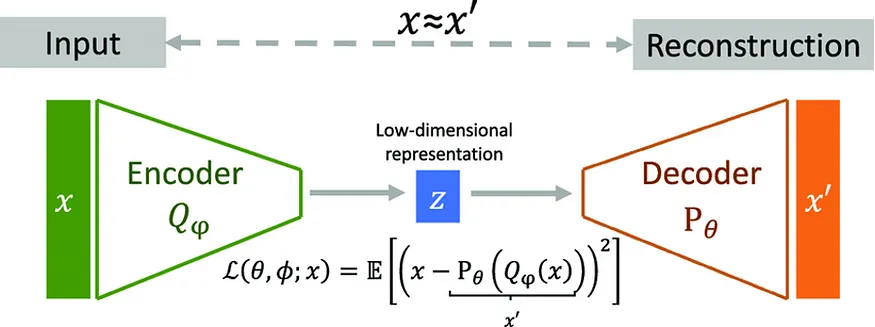

Autoencoders are a type of feedforward neural network where the input is the same as the output. They compress the input into a lower-dimensional latent representation and then reconstruct the output from this representation. An autoencoder consists of three main components:

1. **Encoder**: Compresses the input and produces the latent representation.
2. **Latent Representation**: A lower-dimensional feature space where important features are preserved.
3. **Decoder**: Reconstructs the input using the latent representation.

## Dimensionality Reduction

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Generate synthetic data
n_samples = 500
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=1, random_state=123)

# Add a random third feature for 3D plotting
X = np.concatenate((X, np.random.random((n_samples, 1))), axis=1)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Create an interactive 3D scatter plot
def plot_interactive_3D(X, y):
    fig = px.scatter_3d(
        x=X[:, 0],
        y=X[:, 1],
        z=X[:, 2],
        color=y.astype(str),  # Color by cluster label
        labels={'x': 'X1', 'y': 'X2', 'z': 'X3', 'color': 'Cluster Label'}
    )
    fig.update_traces(marker=dict(size=5))  # Adjust marker size
    fig.update_layout(scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='X3'
    ))
    fig.show()

# Call the function
plot_interactive_3D(X, y)

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, datasets, utils, models

class autoencoder(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 2),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
BATCH_SIZE = 100
torch.manual_seed(1)
X_tensor = torch.tensor(X, dtype=torch.float32)
dataloader = DataLoader(X_tensor,
                        batch_size=BATCH_SIZE)
model = autoencoder(3, 2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for batch in dataloader:
        optimizer.zero_grad()           # Clear gradients w.r.t. parameters
        y_hat = model(batch)            # Forward pass to get output
        loss = criterion(y_hat, batch)  # Calculate loss
        loss.backward()                 # Getting gradients w.r.t. parameters
        optimizer.step()                # Update parameters

In [ ]:
model.eval()
print(f"Original X shape = {X_tensor.shape}")
X_encoded = model.encoder(X_tensor)
print(f" Encoded X shape = {X_encoded.shape}")

In [ ]:
colors = []
for i in y:
    if i == 0:
        colors.append('blue')
    else:
        colors.append('red')

In [ ]:
import matplotlib.pyplot as plt

# Detach the tensor and convert it to NumPy
X_encoded_np = X_encoded.detach().numpy()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    X_encoded_np[:, 0],
    X_encoded_np[:, 1],
    c=colors
)

plt.title("2D Scatter Plot")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


## Image Denoising

In [ ]:
BATCH_SIZE = 32

# Download data
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('data/', download=True, train=True, transform=transform)
idx = trainset.targets == 8  # let's only work with the number 8
trainset.targets = trainset.targets[idx]
trainset.data = trainset.data[idx]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_eights(X, noise=0.0):
    """
    Plots a grid of images (MNIST '8's) with optional noise added.

    Parameters:
    - X: A batch of images (PyTorch tensor).
    - noise: Float, the amount of random noise to add to the images.
    """
    # Convert images to NumPy for plotting
    images = X.numpy()
    images = images.squeeze()  # Remove channel dimension if present (e.g., [N, 1, 28, 28] -> [N, 28, 28])

    # Add noise if specified
    if noise > 0.0:
        images += noise * np.random.randn(*images.shape)
        images = np.clip(images, 0.0, 1.0)  # Ensure pixel values remain in valid range [0, 1]

    # Plot images in a grid
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))  # Grid: 4 rows, 8 columns
    axes = axes.flatten()
    for img, ax in zip(images[:32], axes):  # Plot up to 32 images
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    plt.suptitle("MNIST '8's with Noise Level: {:.2f}".format(noise), fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include title
    plt.show()


In [ ]:
# Sample plot
X, y = next(iter(trainloader))
noise = 0.5
plot_eights(X, noise)

In [ ]:
def conv_block(input_channels, output_channels):
    return nn.Sequential(
        nn.Conv2d(input_channels, output_channels, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)  # reduce x-y dims by two; window and stride of 2
    )

def deconv_block(input_channels, output_channels, kernel_size):
    return nn.Sequential(
        nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride=2),
        nn.ReLU()
    )

class autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            conv_block(1, 32),
            conv_block(32, 16),
            conv_block(16, 8)
        )
        self.decoder = nn.Sequential(
            deconv_block(8, 8, 3),
            deconv_block(8, 16, 2),
            deconv_block(16, 32, 2),
            nn.Conv2d(32, 1, 3, padding=1)  # final conv layer to decrease channel back to 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = torch.sigmoid(x)  # get pixels between 0 and 1
        return x

In [ ]:
model = autoencoder()
input_8 = X[:1, :1, :, :]
output_8 = model(input_8)

In [ ]:
def plot_eight_pair(input_img, output_img):
    """
    Plots the input image and its reconstructed output image side by side.

    Parameters:
    - input_img: PyTorch tensor of shape [1, 1, H, W] (single input image).
    - output_img: PyTorch tensor of shape [1, 1, H, W] (single reconstructed image).
    """
    # Convert tensors to NumPy arrays for plotting
    input_img_np = input_img.squeeze().detach().numpy()
    output_img_np = output_img.squeeze().detach().numpy()

    # Plot the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Input image
    axes[0].imshow(input_img_np, cmap='gray')
    axes[0].set_title("Input Image")
    axes[0].axis('off')

    # Output image
    axes[1].imshow(output_img_np, cmap='gray')
    axes[1].set_title("Reconstructed Image")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
plot_eight_pair(input_8, output_8)

In [ ]:
EPOCHS = 20
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
img_list = []

for epoch in range(EPOCHS):
    losses = 0
    for batch, _ in trainloader:
        noisy_batch = batch + noise * torch.randn(*batch.shape)
        noisy_batch = torch.clip(noisy_batch, 0.0, 1.0)
        optimizer.zero_grad()
        y_hat = model(noisy_batch)
        loss = criterion(y_hat, batch)
        loss.backward()
        optimizer.step()
        losses += loss.item()
    print(f"epoch: {epoch + 1}, loss: {losses / len(trainloader):.4f}")
    # Save example results each epoch so we can see what's going on
    with torch.no_grad():
        noisy_8 = noisy_batch[:1, :1, :, :]
        model_8 = model(input_8)
        real_8 = batch[:1, :1, :, :]
    img_list.append(utils.make_grid([noisy_8[0], model_8[0], real_8[0]], padding=1))

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

# Create a figure and axis for the animation
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title("Input           Prediction          Actual")

# Create frames for the animation
ims = [[plt.imshow(np.transpose(i, (1, 2, 0)), animated=True)] for i in img_list]

# Generate the animation
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

# Display the animation inline
HTML(ani.to_jshtml())

## Developing Index

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

adult_data = fetch_openml(name="adult", version=2, as_frame=True)
data = adult_data.frame
data.head()

In [ ]:
data.describe()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Step 2: Separate features (X) and labels (y)
X = data.drop(columns=["class"])  # Input features
y = data["class"]  # Target labels

# Step 3: Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=["category", "object"]).columns
numerical_columns = X.select_dtypes(include=["int64", "float64"]).columns

# Step 4: Apply one-hot encoding to categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Updated parameter name
X_categorical = encoder.fit_transform(X[categorical_columns])

# Step 5: Apply standard scaling to numerical features
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_columns])

# Step 6: Combine categorical and numerical features
X_preprocessed = np.hstack((X_categorical, X_numerical))

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Print the shape of training data and labels
print(f"X_train shape: {X_train.shape}, y_train shape: {len(y_train)}")


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

# Define a custom PyTorch Dataset class for the Adult dataset
class AdultDataset(Dataset):
    def __init__(self, data, labels):
        # Convert data and labels to PyTorch tensors
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels.map({"<=50K": 0, ">50K": 1}).values, dtype=torch.long)

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.data)

    def __getitem__(self, idx):
        # Return a single data point and its corresponding label
        return self.data[idx], self.labels[idx]

# Step 8: Create PyTorch Dataset objects for training and testing sets
train_dataset = AdultDataset(X_train, y_train)
test_dataset = AdultDataset(X_test, y_test)

# Step 9: Create DataLoaders for training and testing sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Print a batch of data and labels from the DataLoader
for data, labels in train_loader:
    print(data.shape, labels.shape)
    break


In [ ]:
import torch.nn as nn

# Define the Autoencoder model
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim=32):
        super(AutoEncoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Sigmoid activation for scaled data (range 0-1)
        )

    def forward(self, x):
        z = self.encoder(x)  # Latent representation
        x_reconstructed = self.decoder(z)  # Reconstructed output
        return x_reconstructed, z  # Return both reconstructed data and latent representation


In [ ]:
# Check if GPU is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize the AutoEncoder model and send to device
input_dim = X_train.shape[1]  # Number of input features
latent_dim = 32  # Dimension of the latent space
autoencoder = AutoEncoder(input_dim, latent_dim).to(device)  # Send model to GPU

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for reconstruction loss
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    autoencoder.train()
    total_loss = 0
    for data, _ in train_loader:  # Ignore labels, as Autoencoder is unsupervised
        # Send data to the same device as the model
        data = data.to(device)

        # Forward pass
        reconstructed, _ = autoencoder(data)
        loss = criterion(reconstructed, data)  # Compare reconstructed data with input

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")


In [ ]:
autoencoder.eval()

train_indexes = []
test_indexes = []

# Training data latent representation
with torch.no_grad():
    for data, _ in train_loader:
        data = data.to(device)  # Move data to the same device as the model
        _, z = autoencoder(data)  # Only need latent representation
        train_indexes.append(z)

# Testing data latent representation
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)  # Move data to the same device as the model
        _, z = autoencoder(data)
        test_indexes.append(z)

# Convert to tensors
train_indexes = torch.cat(train_indexes, dim=0)
test_indexes = torch.cat(test_indexes, dim=0)

# Print the shape of the latent representations
print(f"Train latent representation shape: {train_indexes.shape}")
print(f"Test latent representation shape: {test_indexes.shape}")

In [ ]:
# Save the latent representations for later use
torch.save(train_indexes, "train_indexes.pt")
torch.save(test_indexes, "test_indexes.pt")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Move tensors to CPU and convert to NumPy arrays
train_indexes_np = train_indexes.cpu().numpy()
test_indexes_np = test_indexes.cpu().numpy()

# Compute cosine similarity between a test sample and all train samples
test_sample = test_indexes_np[0]  # Example: first test sample
similarities = cosine_similarity(test_sample.reshape(1, -1), train_indexes_np)

# Find the most similar train sample
most_similar_idx = similarities.argmax()
print(f"Most similar index in training set: {most_similar_idx}")


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between feature vectors
feature_similarity = cosine_similarity(X_train)  # Shape: (n_samples, n_samples)

# Compute similarity between latent representations
latent_similarity = cosine_similarity(train_indexes_np)  # Shape: (n_samples, n_samples)

In [ ]:
temp_latent_similarity = latent_similarity[:1000, :1000]
temp_feature_similarity = feature_similarity[:1000, :1000]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Compute Pearson correlation
latent_flat = temp_latent_similarity.flatten()
feature_flat = temp_feature_similarity.flatten()
correlation, _ = pearsonr(latent_flat, feature_flat)

# Plot heatmaps
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(temp_latent_similarity, cmap="viridis")
plt.title("Latent Similarity Matrix")

plt.subplot(1, 3, 2)
sns.heatmap(temp_feature_similarity, cmap="viridis")
plt.title("Feature Similarity Matrix")

# Compute and plot difference matrix
difference_matrix = temp_latent_similarity - temp_feature_similarity

plt.subplot(1, 3, 3)
sns.heatmap(difference_matrix, cmap="coolwarm", center=0)
plt.title("Difference Matrix")

plt.tight_layout()
plt.show()

# Print Pearson correlation
print(f"Pearson correlation between matrices: {correlation:.4f}")
